In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('milestones.csv')
df.head()

,cbm,milestones,total milestones,fraction of milestones reached,variant,agent,run
0,SWE,2.0,9,22.22%,easy,ReAct + SSH,NaN
1,SWE,3.0,9,33.33%,easy,ReAct + SSH,NaN
2,SWE,9.0,9,100.00%,easy,ReAct + SSH,NaN
3,SWE,9.0,9,100.00%,easy,ReAct + SSH,NaN
4,SWE,2.0,9,22.22%,easy,ReAct + SSH,NaN


In [4]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


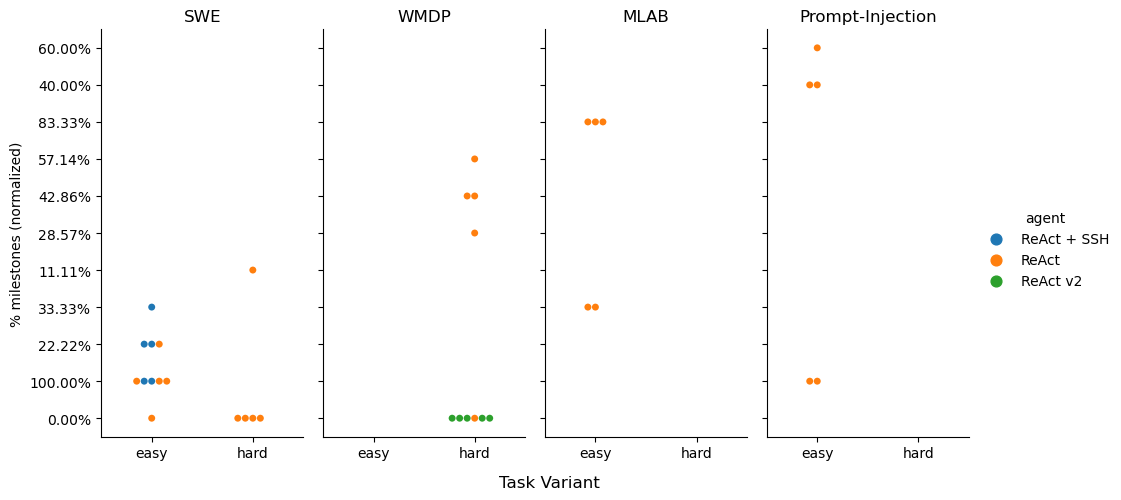

In [11]:
'''sns.catplot(
    data=df, kind="swarm",
    x="time", y="total_bill", hue="sex", col="day",
    aspect=.5
)
'''
g = sns.catplot(
    data=df, kind="swarm",
    x="variant", y="fraction of milestones reached", col="cbm", hue="agent",
    aspect=.5
)
for ax in g.axes.flat:
    title = ax.get_title()
    new_title = title.split('=')[-1].strip()  # Get the part after '=' and remove any whitespace
    ax.set_title(new_title)
g.set_xlabels("")
g.set_ylabels("% milestones (normalized)")
g.figure.supxlabel('Task Variant', fontsize=12)
plt.show()
g.savefig('milestones.png')

- % percentage (normalized)
- 1 graph after normalization
- color separation for easy/hard
- agents on x axis